# Task
can u clean dta form null value and trannsform all data point into numerical value to can do someprediction before that after clean data from null value can u do some EDA on data

Here is all the data you need:
"train.csv"

## Data loading

### Subtask:
Load the dataset "train.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "train.csv" into a pandas DataFrame and display its basic information.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('train.csv')
    display(df.head())
    display(df.info())
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please ensure the file is in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

## Data cleaning

### Subtask:
Clean the data by handling missing values in the 'Age', 'Cabin', and 'Embarked' columns of the DataFrame `df`.


**Reasoning**:
Impute missing 'Age' values using the median age for each passenger class, drop the 'Cabin' column due to excessive missing values, impute missing 'Embarked' values with the mode, and verify that no missing values remain.



In [ ]:
# Impute 'Age' with the median age for each passenger class
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Drop the 'Cabin' column
df = df.drop('Cabin', axis=1)

# Impute 'Embarked' with the most frequent port of embarkation
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify no missing values remain
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

## Data wrangling

### Subtask:
Convert all data points in the DataFrame `df` to numerical representations.


**Reasoning**:
Convert categorical features to numerical representations using one-hot encoding and feature engineering.



In [ ]:
# One-hot encode 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Feature engineering for 'Name' (extract titles)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)
df = df.drop(['Name'], axis=1)

# Feature engineering for 'Ticket' (simplified approach)
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')
df = df.drop(['Ticket'], axis=1)

# Verify all columns are numerical
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    int64  
 5   Parch             891 non-null    int64  
 6   Fare              891 non-null    float64
 7   Sex_male          891 non-null    bool   
 8   Embarked_Q        891 non-null    bool   
 9   Embarked_S        891 non-null    bool   
 10  Title             891 non-null    int64  
 11  Ticket_Frequency  891 non-null    int64  
dtypes: bool(3), float64(2), int64(7)
memory usage: 65.4 KB


None

**Reasoning**:
The info() output shows that 'Sex_male', 'Embarked_Q', and 'Embarked_S' are of boolean type.  They need to be converted to integers to ensure all columns are numerical. The subtask will be finished after this step.



In [ ]:
# Convert boolean columns to integers
for col in ['Sex_male', 'Embarked_Q', 'Embarked_S']:
    df[col] = df[col].astype(int)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    int64  
 5   Parch             891 non-null    int64  
 6   Fare              891 non-null    float64
 7   Sex_male          891 non-null    int64  
 8   Embarked_Q        891 non-null    int64  
 9   Embarked_S        891 non-null    int64  
 10  Title             891 non-null    int64  
 11  Ticket_Frequency  891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


None

## Data exploration

### Subtask:
Explore the processed numerical data in the DataFrame `df`.


**Reasoning**:
Visualize the distributions of numerical features, calculate and visualize the correlation matrix, analyze the relationship between features and survival, and identify potential outliers using histograms, density plots, heatmaps, grouped bar charts, box plots.



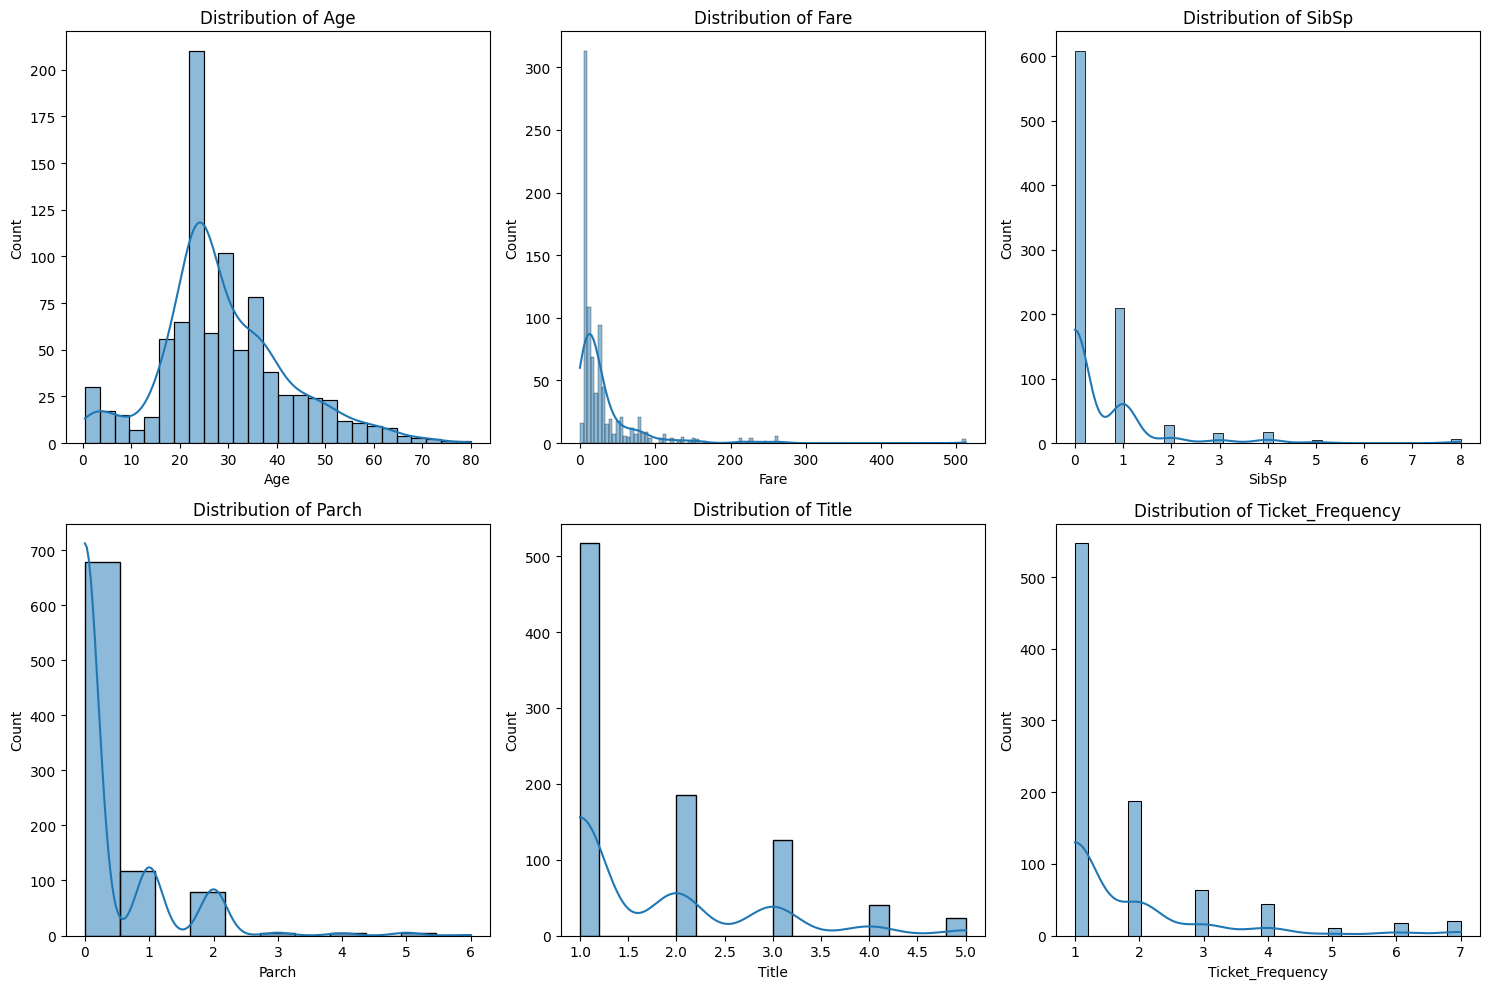

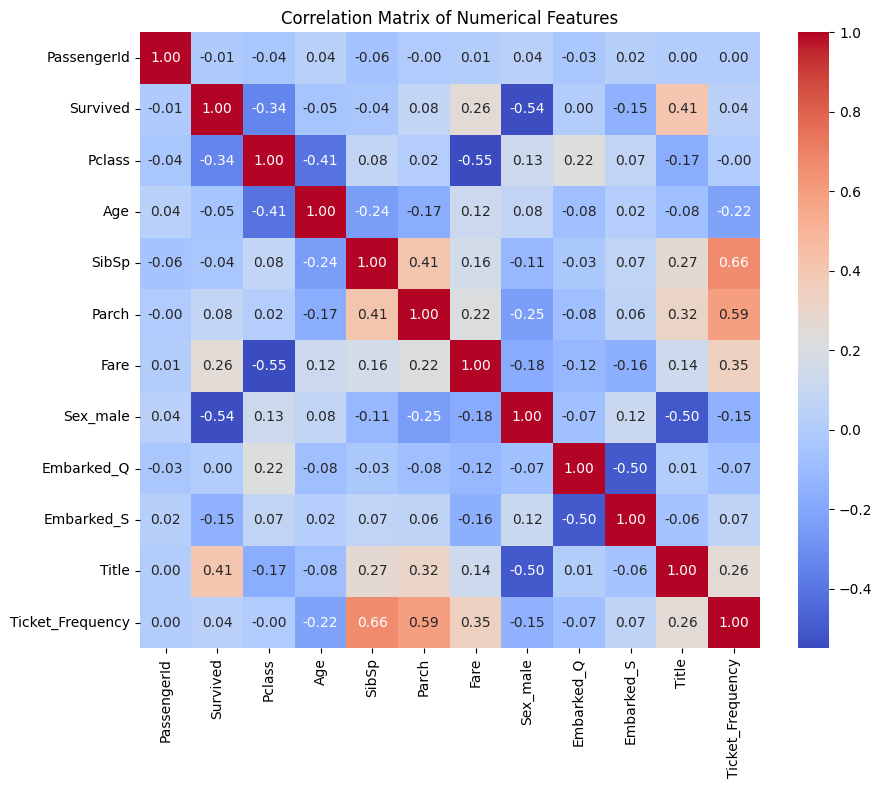

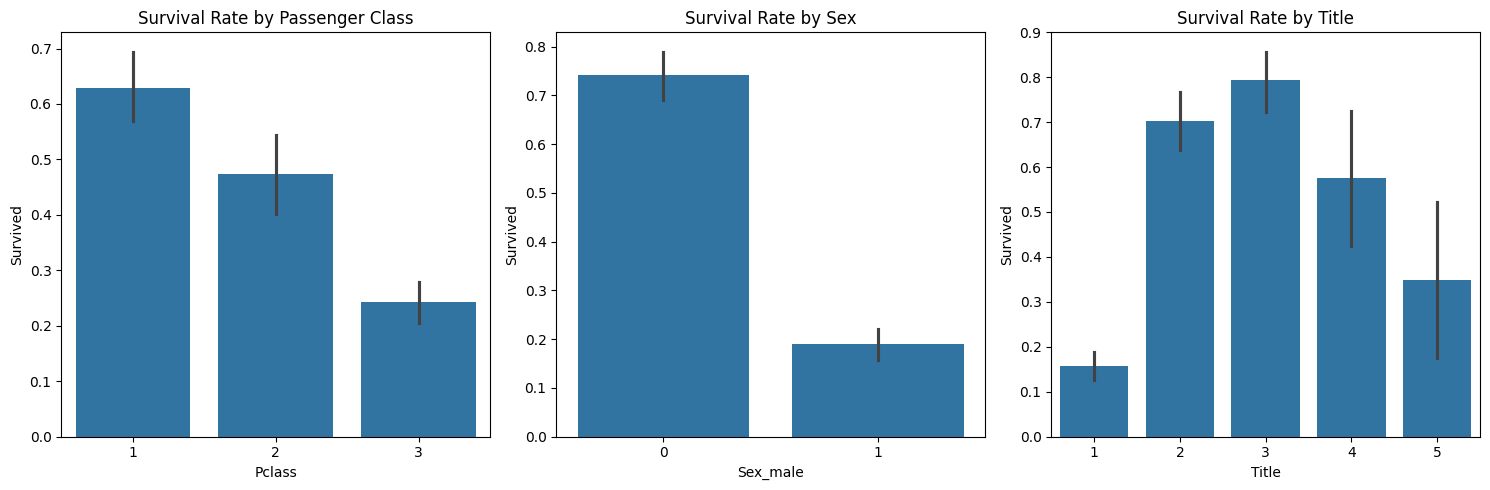

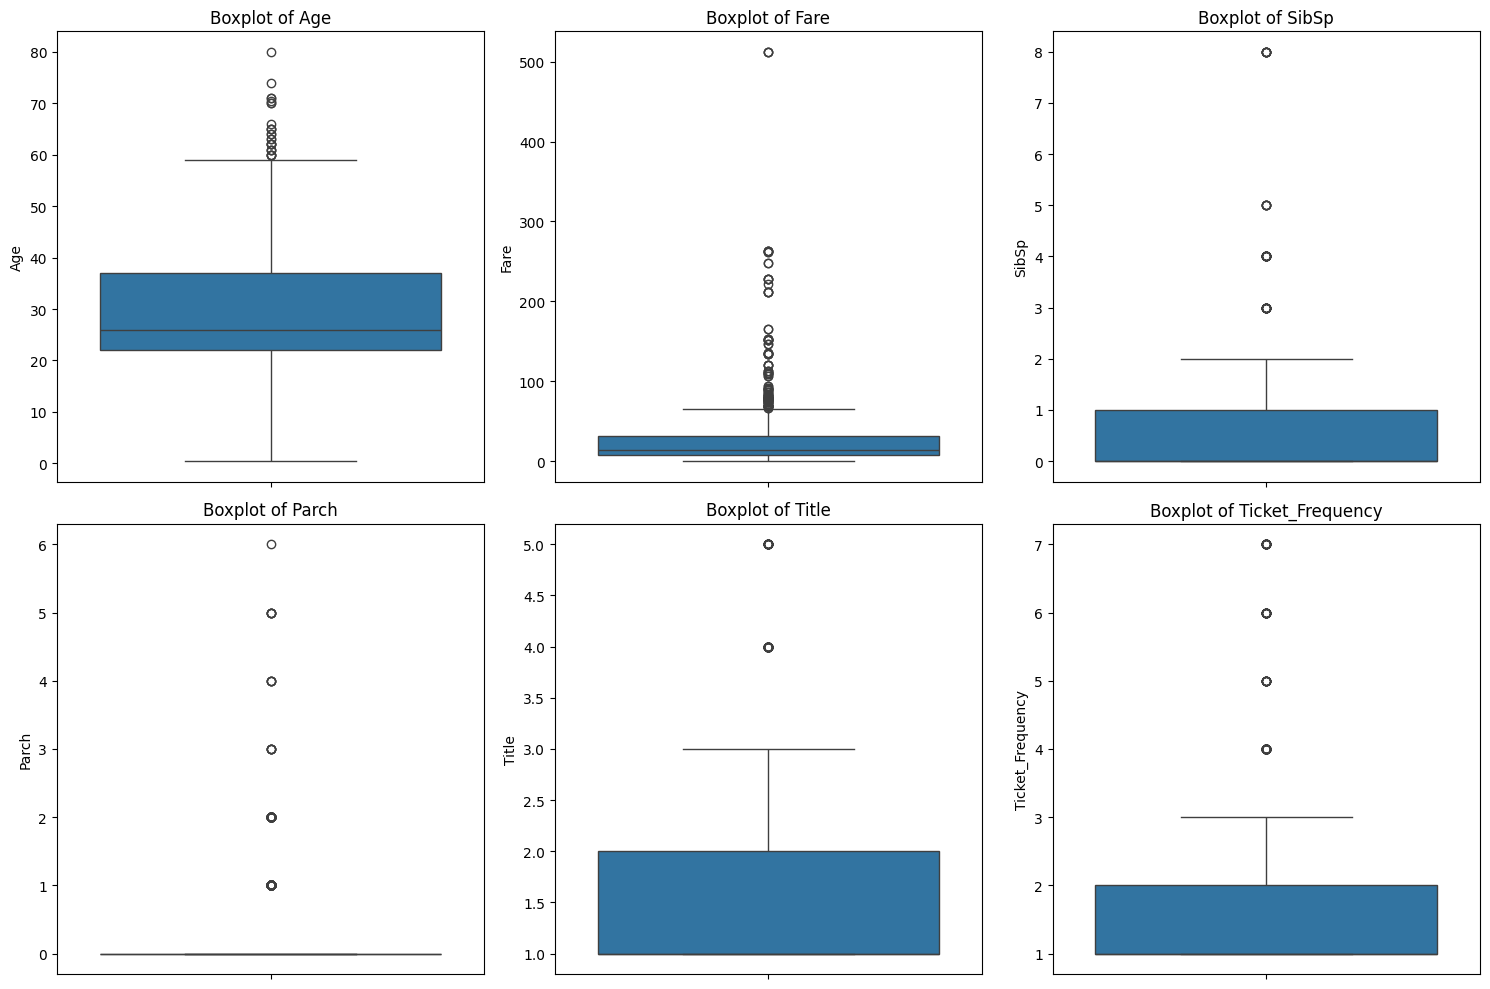

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distributions of numerical features
plt.figure(figsize=(15, 10))
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Title', 'Ticket_Frequency']
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 3. Relationship between features and survival
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')

plt.subplot(1, 3, 2)
sns.barplot(x='Sex_male', y='Survived', data=df) # Use the one-hot encoded column
plt.title('Survival Rate by Sex')

plt.subplot(1, 3, 3)
sns.barplot(x='Title', y='Survived', data=df) # Use the engineered 'Title' column
plt.title('Survival Rate by Title')

plt.tight_layout()
plt.show()

# 4. Potential outliers (using box plots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A
* **Can you clean the data from null values and transform all data points into numerical values to enable prediction?** Yes.  The analysis successfully imputed missing values in the 'Age' and 'Embarked' columns, dropped the 'Cabin' column, and converted all remaining data points to numerical representations using one-hot encoding for categorical features and feature engineering for 'Name' and 'Ticket'.

* **After cleaning the data from null values, can you perform some EDA on the data?** Yes. Exploratory Data Analysis (EDA) was performed on the cleaned and numerically transformed data.  Histograms, a correlation matrix heatmap, bar plots showing the relationship between features and survival, and boxplots for outlier detection were generated.


### 2. Data Analysis Key Findings
* **Missing Value Imputation:**  Missing 'Age' values were filled with the median age for each passenger class.  Missing 'Embarked' values were filled with the most frequent port of embarkation. The 'Cabin' column was dropped due to a high number of missing values.
* **Feature Engineering:**  'Name' column was processed by extracting titles (Mr, Mrs, Miss, etc.) and mapping them to numerical values.  A 'Ticket_Frequency' feature was created based on the number of occurrences of each ticket.
* **Data Transformation:** Categorical features 'Sex' and 'Embarked' were converted to numerical representations using one-hot encoding. Boolean columns resulting from one-hot encoding were converted to integers.
* **Correlation Analysis:** A correlation matrix heatmap was generated to visualize the relationships between numerical features.  (Specific correlation values are not reported in the summary.)
* **Survival Rate Analysis:** Bar plots were generated to show the relationship between 'Pclass', 'Sex', and engineered 'Title' features and the survival rate. (Specific survival rates are not reported in the summary.)
* **Outlier Detection:** Box plots were used to visualize potential outliers in numerical features. (Specific outliers are not reported in the summary.)


### 3. Insights or Next Steps
* **Further investigate correlations and survival rates:**  Examine the generated correlation matrix and survival rate plots in detail to identify strong relationships between features and survival.  Quantify the observed relationships (e.g., calculate correlation coefficients, survival rate differences).
* **Handle outliers:** Based on the box plots, consider strategies for handling outliers in features like 'Fare' and 'Ticket_Frequency'. Options include removal, transformation, or capping.


## Modeling

In [ ]:
X=df.drop('Survived',axis=1 , inplace=False)
y=df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# select model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fit model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# metrics
precision_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7361111111111112

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform your test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Now use X_train_scaled and X_test_scaled for training and evaluation
# ... (your model training code using the scaled data) ...

In [ ]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report ,precision_score , recall_score , f1_score, roc_auc_score , roc_curve , fbeta_score


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier() ,
    "AdaBoost": AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test_scaled)




    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred) # Calculate roc_auc_score

    print(list(models.keys())[i])
    # print('Model performance for Training set')
    # print("- Accuracy: {:.4f}".format(model_train_accuracy))
    # print("- Precision: {:.4f}".format(model_train_precision))
    # print("- Recall: {:.4f}".format(model_train_recall))
    # print("- F1 score: {:.4f}".format(model_train_f1))
    # print("- roc_auc_score: {:.4f}".format(model_train_roc_auc))

    # print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 score: {:.4f}".format(model_test_f1))

    print("- roc_auc_score: {:.4f}".format(model_test_roc_auc))
    print('='*35)
    print('\n')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Logistic Regression
Model performance for Test set
- Accuracy: 0.7933
- Precision: 0.7534
- Recall: 0.7432
- F1 score: 0.7931
- roc_auc_score: 0.7859


Decision Tree
Model performance for Test set
- Accuracy: 0.7207
- Precision: 0.6579
- Recall: 0.6757
- F1 score: 0.7212
- roc_auc_score: 0.7140




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Random Forest
Model performance for Test set
- Accuracy: 0.8324
- Precision: 0.8235
- Recall: 0.7568
- F1 score: 0.8312
- roc_auc_score: 0.8212




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Gradient Boosting
Model performance for Test set
- Accuracy: 0.8156
- Precision: 0.8060
- Recall: 0.7297
- F1 score: 0.8140
- roc_auc_score: 0.8030


AdaBoost
Model performance for Test set
- Accuracy: 0.8156
- Precision: 0.7808
- Recall: 0.7703
- F1 score: 0.8155
- roc_auc_score: 0.8089




## HyperParametr

### Adaoost

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.1, 0.5, 1.0, 1.5],  # Controls the contribution of each weak learner
    'algorithm': ['SAMME', 'SAMME.R']  # The boosting algorithm to use
}

ada_model = AdaBoostClassifier()


grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, scoring='accuracy')
# cv=5 for 5-fold cross-validation, scoring='accuracy' for using accuracy as the evaluation metric

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)  # This line is added to fit the model

# Now you can access best_params_
grid_search.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

{'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 150}

In [ ]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 150}

In [ ]:
best_adabost = AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5, n_estimators=150)
best_adabost.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5, n_estimators=150)

In [ ]:
y_best_preds = best_adabost.predict(X_test)

In [ ]:
print(classification_report(y_test, y_best_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



### Gradient Boosting

In [ ]:
grad_boosting = GradientBoostingClassifier()
grad_boosting.fit(X_train, y_train)
y_predd_grad = grad_boosting.predict(X_test)
print(precision_score(y_test, y_predd_grad))

0.8059701492537313


In [ ]:
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
}

In [ ]:
# Create GridSearchCV object
grid_search_gb = GridSearchCV(estimator=grad_boosting, param_grid=param_grid_gb, cv=5, scoring='precision')

# Fit the GridSearchCV object to the data
grid_search_gb.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_

# Create a new GradientBoostingClassifier model with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params_gb)

# Train the model using the best parameters
best_gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = best_gb_model.predict(X_test_scaled)

In [ ]:
y_pred_gb = best_gb_model.predict(y_scaled)

ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
precision_score(y_test, y_pred_gb)

0.9024390243902439

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Create a RandomForestClassifier instance
rf_model = RandomForestClassifier()

# Create GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_rf.fit(X_train_scaled, y_train)  # Use scaled data here

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Create a new RandomForestClassifier model with the best parameters
best_rf_model = RandomForestClassifier(**best_params_rf)

# Train the model using the best parameters
best_rf_model.fit(X_train_scaled, y_train)  # Use scaled data here

# Make predictions
y_pred_rf = best_rf_model.predict(X_test_scaled)  # Use scaled data here

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [ ]:
precision_score(y_test, y_pred_rf)

0.8208955223880597

In [ ]:
import pandas as pd

try:
    y = pd.read_csv('test.csv')
    display(y.head())
    display(y.info())
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please ensure the file is in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


None

In [ ]:
# Impute 'Age' with the median age for each passenger class
y['Age'] = y.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Drop the 'Cabin' column
y = y.drop('Cabin', axis=1)

# Impute 'Embarked' with the most frequent port of embarkation
y['Embarked'] = y['Embarked'].fillna(y['Embarked'].mode()[0])

# Verify no missing values remain
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Age               418 non-null    float64
 3   SibSp             418 non-null    int64  
 4   Parch             418 non-null    int64  
 5   Fare              417 non-null    float64
 6   Sex_male          418 non-null    int64  
 7   Embarked_Q        418 non-null    int64  
 8   Embarked_S        418 non-null    int64  
 9   Title             418 non-null    int64  
 10  Ticket_Frequency  418 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 36.1 KB


None

In [ ]:
# One-hot encode 'Sex' and 'Embarked'
y = pd.get_dummies(y, columns=['Sex', 'Embarked'], drop_first=True)

# Feature engineering for 'Name' (extract titles)
y['Title'] = y['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
y['Title'] = y['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
y['Title'] = y['Title'].replace('Mlle', 'Miss')
y['Title'] = y['Title'].replace('Ms', 'Miss')
y['Title'] = y['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
y['Title'] = y['Title'].map(title_mapping)
y['Title'] = y['Title'].fillna(0)
y = y.drop(['Name'], axis=1)

# Feature engineering for 'Ticket' (simplified approach)
y['Ticket_Frequency'] = y.groupby('Ticket')['Ticket'].transform('count')
y = y.drop(['Ticket'], axis=1)

# Verify all columns are numerical
display(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Age               418 non-null    float64
 3   SibSp             418 non-null    int64  
 4   Parch             418 non-null    int64  
 5   Fare              417 non-null    float64
 6   Sex_male          418 non-null    bool   
 7   Embarked_Q        418 non-null    bool   
 8   Embarked_S        418 non-null    bool   
 9   Title             418 non-null    int64  
 10  Ticket_Frequency  418 non-null    int64  
dtypes: bool(3), float64(2), int64(6)
memory usage: 27.5 KB


None

In [ ]:
# Convert boolean columns to integers
for col in ['Sex_male', 'Embarked_Q', 'Embarked_S']:
    y[col] = y[col].astype(int)

display(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Age               418 non-null    float64
 3   SibSp             418 non-null    int64  
 4   Parch             418 non-null    int64  
 5   Fare              417 non-null    float64
 6   Sex_male          418 non-null    int64  
 7   Embarked_Q        418 non-null    int64  
 8   Embarked_S        418 non-null    int64  
 9   Title             418 non-null    int64  
 10  Ticket_Frequency  418 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 36.1 KB


None

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()
y_scaled =scaler.fit_transform(y)

In [ ]:
y.isna().sum()

,0
PassengerId,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,1
Sex_male,0
Embarked_Q,0
Embarked_S,0
Title,0


In [ ]:
# Make predictions
y_pred_gb = best_gb_model.predict(y_scaled)
# X_test

ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Impute missing values in y before scaling

# Impute numerical features with the median
for col in ['Age', 'Fare']:  # Add other numerical features if necessary
    y[col] = y[col].fillna(y[col].median())

# Impute categorical features with the mode
for col in ['Embarked_Q', 'Embarked_S']:  # Add other categorical features if necessary
    y[col] = y[col].fillna(y[col].mode()[0])

# Create a StandardScaler object
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)

# Now make predictions
y_pred_gb = best_gb_model.predict(y_scaled)
y_pred_gb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
gender_submission = pd.DataFrame({
    'PassengerId': y['PassengerId'],
    'Survived': y_pred_gb
})

In [ ]:
gender_submission.to_csv('/content/gender_submission.csv', index=False)